### This is a small sample of the analysis for my post-doctoral work on RNA modifications. 

 What this small notebook will show just a quick run-through of the thought process behind some of the work I've done and how I attempt to visualize with some meaning the results I find.

 So, for this, we're going to be examining the result of one type of output for the 256 signatures for 1-methyladenosine (m1A)   in biological context: 
 
#### NN-(m1A)-NN

 with N = A,C,G,T. 

 
 For our sequencing data, the signal we see comes in 3 main flavors: 
 
 * the proper incorporation of the template nucleotide; so, if we start with an A in the sequence, we see an A
 * a mutation: if the sequence contains an A, but instead we see a C, G, or T
 * a truncation: signal drops off at a site
 
Here, we'll be focusing on mutations only caused in deep sequencing as a result of the modification m1A. 

So, we're looking at signals of __C__, __G__, and __T__. 


To start, we'll import the necessary libraries we'll need: numpy for array handling, pandas to import the data, matplotlib and Axes3D for some interesting visualization, and sklearn's KMeans for clustering the data. Since we don't know what to expect, this is just an unsupervised learning to see what we'll find.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

Importing the data and making sure everything looks good. 

The data contains several columns:

1. The signature of the modification, so the A in the center with flanking random letters on either side (Remember, NNm1ANN)

2. Several columns containing the ratio of incorporated nucleotide at that position. 

3. The last column is just the ratio of non-A signal in this case. 

To verify, we can just write 'sig_df' to veirfy that we have 256 contexts, from the NN(mod)NN, or 4\*4\*1\*4\*4. 

In [2]:
sig_df = pd.read_csv('./Aggregate.txt',sep='\t', header = 0)
sig_df.head()

,Signature,A_Ratio,C_Ratio,G_Ratio,T_Ratio,Mismatch
0,m1A_AAAAA,0.451737,0.058301,0.037452,0.452510,0.548263
1,m1A_ACAAA,0.354586,0.303444,0.015684,0.326287,0.645414
2,m1A_AGAAA,0.299775,0.100982,0.449560,0.149683,0.700225
3,m1A_ATAAA,0.372769,0.068603,0.022401,0.536227,0.627231
4,m1A_CAAAA,0.486603,0.034734,0.030764,0.447899,0.513397


So, again, we're looking at mutations only. So, in this case, we just want to see the non-A ratios, so we'll throw this into a numpy array since we can't use pandas' dataframes with our scikit-learn tools.

In [7]:
sig_np = sig_df.as_matrix(columns=['C_Ratio','G_Ratio','T_Ratio'])

We need to make one quick adjustment here. As you can see above, even though there is a modification at this position, it will sometimes incorporate the right letter in the output. 

To account for variable incorporation, we'll normalize these *mutational* columns to add to 1. 

In [8]:
sig_np = sig_np/sig_np.sum(axis=1)[:,None]
sig_np[0]

array([ 0.10633803,  0.06830986,  0.82535211])

Now let's just take a look at the data. Very basic 3-D scatter plot, just showing the rough scatter of the ratios of misincorporation.

<IPython.core.display.Javascript object>


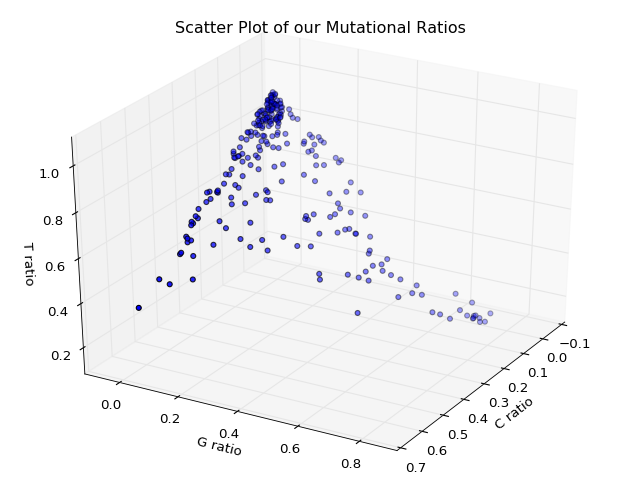

In [9]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
ax.scatter(sig_np[:,0],sig_np[:,1],sig_np[:,2])
ax.set_xlabel('C ratio')
ax.set_ylabel('G ratio')
ax.set_zlabel('T ratio')
ax.set_title('Scatter Plot of our Mutational Ratios')
ax.view_init(30,30)
plt.show()

There appears to be one very large cluster, but the rest of the points are sparse. However, there may be some patterning to the rest of the data.

**And now we fit**...

For the sake of this example, I'm going to allow for 6 different clusters. In various other data not presented here we've seen different patterns with fewer clusters, but this data looks to be pretty spread. 

In [10]:
estimator = KMeans(6)
estimator.fit(sig_np)
labels = estimator.labels_
labels

array([2, 4, 1, 2, 2, 0, 1, 2, 2, 4, 3, 2, 2, 4, 1, 0, 2, 0, 3, 2, 2, 0, 3,
       2, 2, 0, 0, 2, 2, 0, 3, 2, 2, 0, 3, 2, 2, 0, 3, 2, 2, 0, 3, 2, 2, 0,
       3, 2, 2, 4, 1, 2, 2, 0, 1, 2, 0, 4, 3, 2, 2, 4, 1, 0, 5, 0, 1, 5, 5,
       4, 1, 2, 5, 4, 3, 2, 5, 4, 1, 3, 5, 0, 3, 2, 5, 0, 3, 2, 5, 4, 4, 0,
       5, 0, 3, 0, 5, 2, 3, 2, 5, 0, 3, 2, 5, 0, 3, 2, 5, 0, 3, 5, 3, 4, 1,
       5, 5, 4, 1, 2, 3, 4, 1, 0, 5, 4, 1, 3, 2, 2, 3, 2, 2, 0, 3, 2, 2, 2,
       0, 2, 2, 2, 3, 2, 2, 2, 5, 2, 5, 0, 5, 2, 2, 2, 0, 2, 2, 2, 5, 2, 2,
       2, 3, 2, 5, 0, 3, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 3, 2, 5, 0, 3, 2,
       2, 2, 0, 2, 2, 2, 3, 2, 2, 0, 1, 2, 2, 4, 1, 2, 2, 4, 4, 2, 2, 4, 1,
       5, 2, 2, 3, 2, 2, 4, 3, 2, 2, 0, 0, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 4,
       1, 2, 2, 0, 4, 2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 4, 1, 2, 2, 4, 4, 2, 2,
       0, 1, 0])

This code just allows us to rotate the plot. As well, I wanted to set a color map just so I know what colors represent each cluster so I can call this later. 





<IPython.core.display.Javascript object>


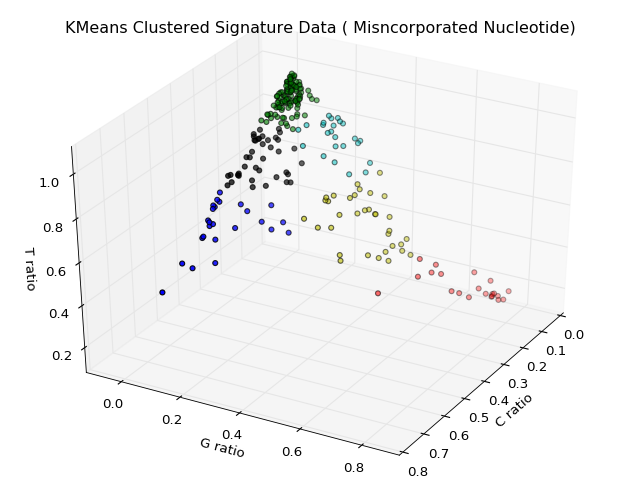

In [11]:
%matplotlib nbagg

label_color_map = {0:'k',
                   1:'r',
                   2:'g',
                   3:'y',
                   4:'b',
                   5:'c',
                   6:'m',
                   7:'orange'
                  }

label_color = [label_color_map[l] for l in labels]

fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
ax.scatter(sig_np[:,0],sig_np[:,1],sig_np[:,2],c=label_color)
ax.set_xlabel('C ratio')
ax.set_ylabel('G ratio')
ax.set_zlabel('T ratio')
ax.set_xlim(0,.8)
ax.set_xlim(0,.8)
ax.set_xlim(0,.8)
ax.set_title('KMeans Clustered Signature Data ( Misncorporated Nucleotide)')



for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    

#### Now just to look back at which label belongs to which signature, and see what patterns may exist.

In [12]:
cluster = pd.DataFrame(data=estimator.labels_,index=sig_df['Signature'])
cluster.columns=['KMeans_Cluster_ID']
cluster.head(n=10)

,KMeans_Cluster_ID
Signature,
m1A_AAAAA,2
m1A_ACAAA,4
m1A_AGAAA,1
m1A_ATAAA,2
m1A_CAAAA,2
m1A_CCAAA,0
m1A_CGAAA,1
m1A_CTAAA,2
m1A_GAAAA,2


In [13]:
cluster[cluster['KMeans_Cluster_ID']==0]

,KMeans_Cluster_ID
Signature,
m1A_CCAAA,0
m1A_TTAAA,0
m1A_ACAAC,0
m1A_CCAAC,0
m1A_GCAAC,0
m1A_GGAAC,0
m1A_TCAAC,0
m1A_ACAAG,0
m1A_CCAAG,0


This data represents the ID label for black points, which represent a high G ratio with low C and T. 

For the most part, upon visual inspection, most of these seem to contain a G in the second position, so our context appears to be: 

**NG(m1A)NN**

Possibly signifying that this nearest neighbor effect causes a G to be incorporated at the site of modification. 